In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from numpy import absolute
from numpy import mean
from numpy import std
from numpy import arange
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV 
from sklearn import linear_model
from sklearn.linear_model import lasso_path, enet_path
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold

from statsmodels.stats.outliers_influence import variance_inflation_factor 
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [32]:
df = pd.read_excel('C:/Users/nasty/Canada_Toronto.xlsx')

In [33]:
df.shape

(7501, 74)

In [4]:
df.head()

item_id  bathrooms  numberOfRooms    price  Amenities  Basement  Private  \
0  1855634          3              4   871000          1         1        1   
1  1855635          3              6   803000          0         1        0   
2  1855636          2              3   774000          0         0        1   
3  1855637          6              8   738000          1         0        0   
4  1855638          5              5  1809000          0         0        0   

   Garage  Schools  Transit    ...      street_Roehampton Avenue  \
0       1        0        0    ...                             0   
1       0        1        1    ...                             0   
2       0        0        0    ...                             0   
3       0        0        0    ...                             0   
4       0        0        0    ...                             0   

   street_Saint Clair Avenue West  street_Scarborough  street_Scarlett Road  \
0                               0                   0                     0   
1                               0                   1                     0   
2                               0                   0                     0   
3                               0                   0                     0   
4                               0                   0                     0   

   street_The Esplanade  street_The Queensway  street_Western Battery Road  \
0                     0                     0                            0   
1                     0                     0                            0   
2                     0                     0                            0   
3                     0                     0                            0   
4                     0                     0                            0   

   street_Yonge Street  street_York Street  log_price  
0                    0                   0  13.677397  
1                    0                   0  13.596110  
2                    0                   0  13.559327  
3                    0                   0  13.511699  
4                    0                   0  14.408285  

[5 rows x 74 columns]

In [5]:
df.columns

Index(['item_id', 'bathrooms', 'numberOfRooms', 'price', 'Amenities',
       'Basement', 'Private', 'Garage', 'Schools', 'Transit', 'Restaurants',
       'Parking', 'Deck', 'Pool', 'Backyard', 'Appliances', 'Quartz',
       'Laundry', 'Quiet', 'Granite', 'Closet', 'East', 'Concept', 'Modern',
       'West', 'Financial', 'Parks', 'Entertainment', 'Hardwood', 'Storage',
       'Park', 'Lake', 'Balcony', 'North', 'School', 'Laminate', 'Concierge',
       'Condo', 'Upgraded', 'Bar', 'Subway', 'Gym', 'Locker', 'Terrace',
       'space', 'light', 'City_center', 'luxary', 'Shop', 'great_view',
       'street_Adelaide Street West', 'street_Bay Street',
       'street_Bayview Avenue', 'street_Blue Jays Way',
       'street_Dundas Street East', 'street_East York', 'street_Etobicoke',
       'street_Fort York Boulevard', 'street_Front Street West',
       'street_King Street', 'street_Lake Shore Boulevard West',
       'street_North York', 'street_Queens Quay West',
       'street_Richmond Street

In [34]:
df['sum']=(df['School']+df['Schools']).astype(bool).astype(int)

In [35]:
df = df.drop(columns=['School', 'Schools'])

In [36]:
df = df.rename(columns={"sum": "School"})

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7501 entries, 0 to 854
Data columns (total 73 columns):
item_id                             7501 non-null int64
bathrooms                           7501 non-null int64
numberOfRooms                       7501 non-null int64
price                               7501 non-null int64
Amenities                           7501 non-null int64
Basement                            7501 non-null int64
Private                             7501 non-null int64
Garage                              7501 non-null int64
Transit                             7501 non-null int64
Restaurants                         7501 non-null int64
Parking                             7501 non-null int64
Deck                                7501 non-null int64
Pool                                7501 non-null int64
Backyard                            7501 non-null int64
Appliances                          7501 non-null int64
Quartz                              7501 non-null int6

In [10]:
df.describe()

item_id    bathrooms  numberOfRooms         price    Amenities  \
count  7.501000e+03  7501.000000    7501.000000  7.501000e+03  7501.000000   
mean   1.887157e+06     2.263165       3.082122  8.013534e+05     0.262765   
std    1.120821e+04     1.126559       1.496459  3.152921e+05     0.440165   
min    1.855634e+06     1.000000       1.000000  4.530000e+05     0.000000   
25%    1.882061e+06     2.000000       2.000000  5.560000e+05     0.000000   
50%    1.888155e+06     2.000000       3.000000  7.150000e+05     0.000000   
75%    1.893814e+06     3.000000       4.000000  9.230000e+05     1.000000   
max    1.903267e+06    10.000000      16.000000  2.244000e+06     1.000000   

          Basement      Private       Garage      Transit  Restaurants  \
count  7501.000000  7501.000000  7501.000000  7501.000000  7501.000000   
mean      0.168244     0.123983     0.092388     0.120517     0.173444   
std       0.374108     0.329585     0.289592     0.325587     0.378656   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     0.000000     0.000000     0.000000     0.000000   
50%       0.000000     0.000000     0.000000     0.000000     0.000000   
75%       0.000000     0.000000     0.000000     0.000000     0.000000   
max       1.000000     1.000000     1.000000     1.000000     1.000000   

          ...       street_Saint Clair Avenue West  street_Scarborough  \
count     ...                          7501.000000         7501.000000   
mean      ...                             0.008799            0.174243   
std       ...                             0.093395            0.379344   
min       ...                             0.000000            0.000000   
25%       ...                             0.000000            0.000000   
50%       ...                             0.000000            0.000000   
75%       ...                             0.000000            0.000000   
max       ...                             1.000000            1.000000   

       street_Scarlett Road  street_The Esplanade  street_The Queensway  \
count           7501.000000           7501.000000           7501.000000   
mean               0.003733              0.008666              0.009199   
std                0.060987              0.092691              0.095474   
min                0.000000              0.000000              0.000000   
25%                0.000000              0.000000              0.000000   
50%                0.000000              0.000000              0.000000   
75%                0.000000              0.000000              0.000000   
max                1.000000              1.000000              1.000000   

       street_Western Battery Road  street_Yonge Street  street_York Street  \
count                  7501.000000          7501.000000         7501.000000   
mean                      0.006133             0.038395            0.012265   
std                       0.078075             0.192160            0.110074   
min                       0.000000             0.000000            0.000000   
25%                       0.000000             0.000000            0.000000   
50%                       0.000000             0.000000            0.000000   
75%                       0.000000             0.000000            0.000000   
max                       1.000000             1.000000            1.000000   

         log_price       School  
count  7501.000000  7501.000000  
mean     13.528134     0.253966  
std       0.350736     0.435307  
min      13.023647     0.000000  
25%      13.228524     0.000000  
50%      13.480038     0.000000  
75%      13.735385     1.000000  
max      14.623771     1.000000  

[8 rows x 73 columns]

In [21]:
# Графики в svg выглядят более четкими
%config InlineBackend.figure_format = 'svg' 

C:\Users\nasty\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


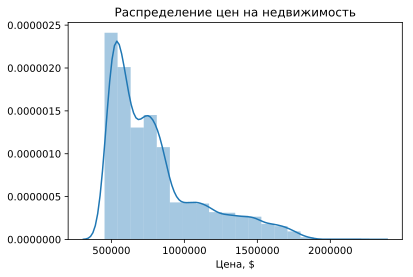

In [11]:
g = sns.distplot(df.price, bins = 20)
g.set_title("Распределение цен на недвижимость")
g.set( xlabel ='Цена, $')
plt.show()

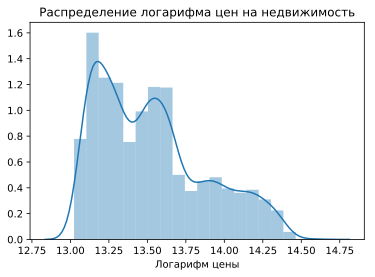

In [12]:
g = sns.distplot(df.log_price, bins = 20)
g.set_title("Распределение логарифма цен на недвижимость")
g.set( xlabel ='Логарифм цены')
plt.show()

# Обработка выбросов

Text(0.5, 1.0, 'Распределение количества ванных комнат')

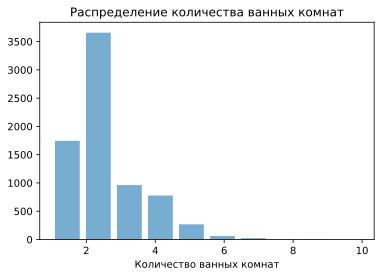

In [22]:
plt.hist(df.bathrooms, rwidth=0.8, alpha=0.6)
plt.xlabel('Количество ванных комнат')
plt.title("Распределение количества ванных комнат")

Text(0.5, 1.0, 'Распределение количества ванных комнат')

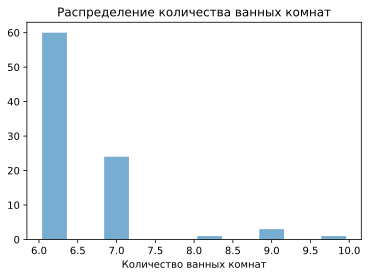

In [14]:
plt.hist(df[df.bathrooms >= 6].bathrooms, rwidth=0.8, alpha=0.6)
plt.xlabel('Количество ванных комнат')
plt.title("Распределение количества ванных комнат")

Уберем наблюдения, где количество ванных комнат превышает 8 шт.

In [37]:
df = df.drop(df[df.bathrooms >=8].index)

Text(0.5, 1.0, 'Распределение количества комнат')

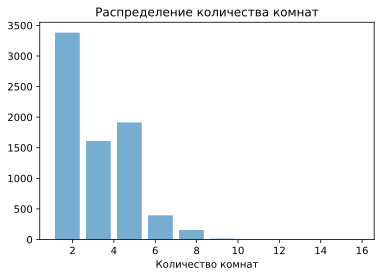

In [17]:
plt.hist(df.numberOfRooms, rwidth=0.8, alpha=0.6)
plt.xlabel('Количество комнат')
plt.title("Распределение количества комнат")

Text(0.5, 1.0, 'Распределение количества комнат')

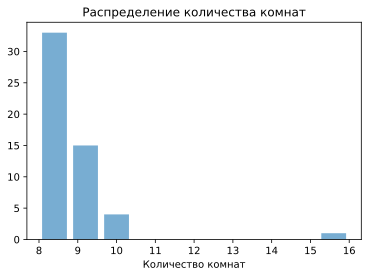

In [18]:
plt.hist(df[df.numberOfRooms >= 8].numberOfRooms, rwidth=0.8, alpha=0.6)
plt.xlabel('Количество комнат')
plt.title("Распределение количества комнат")

Уберем наблюдения, где количество комнат превышает 9 шт.

In [38]:
df = df.drop(df[df.numberOfRooms >= 9].index)

# Оценка зависимостей

Text(0.5, 1.0, 'Корреляционная таблица')

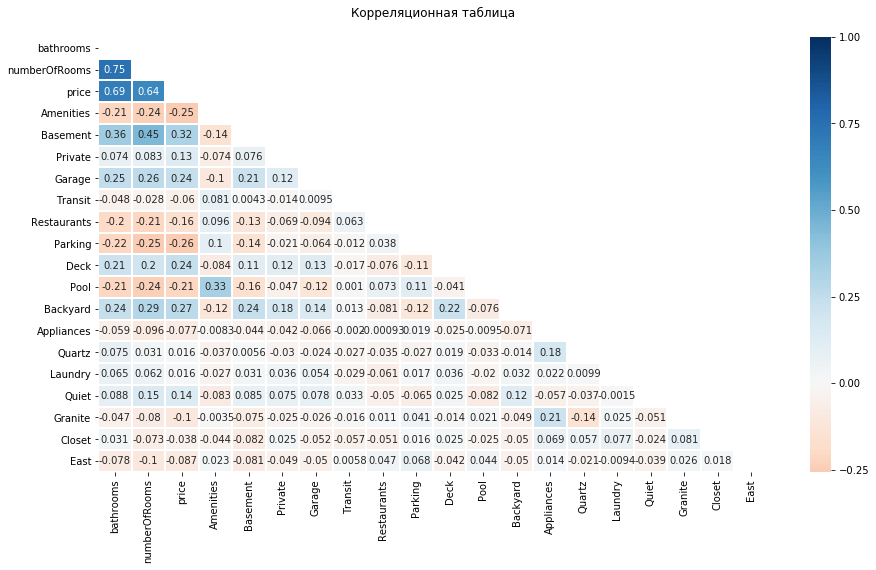

In [13]:
fig = plt.subplots(figsize=(15, 8))
mask = np.triu(np.ones_like(df.iloc[:, 1:21].corr(), dtype=bool))
sns.heatmap(df.iloc[:, 1:21].corr(), 
            annot=True,
            cmap = 'RdBu', 
            linewidths=1.0, 
            linecolor='white',
            center = 0,
            mask = mask)
plt.title("Корреляционная таблица",  pad = 20)

In [14]:
df['log_price'].corr(df['numberOfRooms'])

0.6817405525466196

In [15]:
result = (pd.Series([df['log_price'].corr(df[col]) for col in df], index=df.columns, name = 'log_price').sort_values())
result.to_frame()

log_price
great_view                        -0.406823
Condo                             -0.368624
Balcony                           -0.350415
Gym                               -0.277012
Concierge                         -0.271781
Parking                           -0.266350
Amenities                         -0.265076
Locker                            -0.264872
Pool                              -0.231973
Laminate                          -0.207825
Restaurants                       -0.172918
Lake                              -0.165681
City_center                       -0.148592
Subway                            -0.143202
Terrace                           -0.141002
Park                              -0.139673
luxary                            -0.131826
West                              -0.126567
Financial                         -0.117950
Granite                           -0.112408
space                             -0.109233
street_Yonge Street               -0.105927
item_id                           -0.104153
Entertainment                     -0.101311
street_Lake Shore Boulevard West  -0.099700
street_King Street                -0.092467
East                              -0.091730
Appliances                        -0.089231
street_Front Street West          -0.087232
Upgraded                          -0.085802
...                                     ...
Modern                            -0.051782
light                             -0.050507
Closet                            -0.049664
street_Adelaide Street West       -0.047349
street_Richmond Street West       -0.045819
street_Scarlett Road              -0.045619
street_The Esplanade              -0.044281
street_Western Battery Road       -0.042208
street_Saint Clair Avenue West    -0.036276
street_Blue Jays Way              -0.035340
Storage                           -0.030368
Laundry                            0.014042
Quartz                             0.016870
Parks                              0.050814
street_Etobicoke                   0.071741
street_North York                  0.093303
street_Scarborough                 0.116178
Private                            0.139726
street_East York                   0.142295
Quiet                              0.148776
Hardwood                           0.159510
School                             0.230978
Deck                               0.250838
Garage                             0.259430
Backyard                           0.297188
Basement                           0.355880
numberOfRooms                      0.681741
bathrooms                          0.703446
price                              0.983377
log_price                          1.000000

[73 rows x 1 columns]

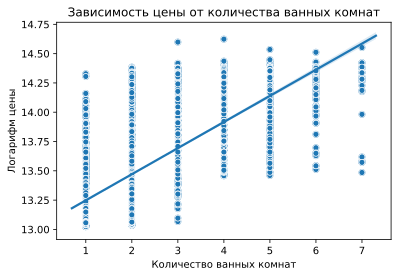

In [27]:
g = plt.subplots_adjust(wspace = 0.5)
g = sns.regplot(x = 'bathrooms' , y = 'log_price' , data = df)
g = sns.scatterplot(x= 'bathrooms', y= 'log_price',  data = df)
g.set_title("Зависимость цены от количества ванных комнат")
g.set( xlabel ='Количество ванных комнат', ylabel = 'Логарифм цены')
plt.show()

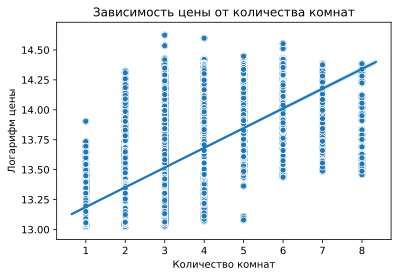

In [ ]:
g = plt.subplots_adjust(wspace = 0.5)
g = sns.regplot(x = 'numberOfRooms' , y = 'log_price' , data = df)
g = sns.scatterplot(x= 'numberOfRooms', y= 'log_price',  data = df)
g.set_title("Зависимость цены от количества комнат")
g.set( xlabel ='Количество комнат', ylabel = 'Логарифм цены')
plt.show()

## Подготовка данных: выделение зависимой и объясняющих переменных

In [18]:
SEED = 5

In [39]:
y = df['log_price']
X = df[df.columns.difference(['log_price', 'price', 'item_id'])]
print(X.shape, y.shape)

(7328, 70) (7328,)


## OLS

In [19]:
ols = sm.OLS(y, X)
results = ols.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              log_price   R-squared:                       0.663
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     206.8
Date:                Fri, 11 Dec 2020   Prob (F-statistic):               0.00
Time:                        16:24:37   Log-Likelihood:                 1260.0
No. Observations:                7328   AIC:                            -2380.
Df Residuals:                    7258   BIC:                            -1897.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
                                       coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------
Amenitie

##  VIF

In [20]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 

In [24]:
vif_data["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 

In [27]:
vif_data[vif_data.VIF >= 5]

feature       VIF
53    street_Etobicoke  5.135545
58   street_North York  8.585668
63  street_Scarborough  5.737954

Так как ни для какого из факторов VIF превышает 10, мультиколлинеарность в модели отсутсвует. Однако, для того, чтобы выделить наиболее значимые фатокры, воспользуемся регуляризацией с помощью LASSO.Он поможет занулить менее важные факторы.

## LASSO

In [30]:
# Подберем параметр альфа в LASSO с помощью кросс-валидации GridSearchCV

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# define grid
grid = dict()
grid['alpha'] = arange(-5, 10, 0.01)
# define search
search = GridSearchCV(lasso, grid, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# perform the search
results = search.fit(X, y)
# summarize
print('MAE: %.3f' % results.best_score_)
print('Config: %s' % results.best_params_)

KeyboardInterrupt: 

In [ ]:
lasso = linear_model.Lasso(alpha=0.007)
lasso.fit(X,y)

In [ ]:
coefs = pd.DataFrame({'lasso_coefficient': lasso.coef_ }, index = X.columns)
coefs.index.name = 'factor'
coefs[coefs.lasso_coefficient != 0].sort_values(by = 'lasso_coefficient')

C:\Users\nasty\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


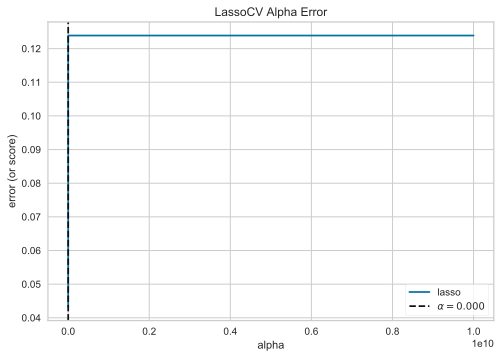

In [ ]:
# Попытка визуализации LassoCV alfa Error

from sklearn.linear_model import LassoCV
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import AlphaSelection


# Create a list of alphas to cross-validate against
alphas = np.logspace(-10, 10, 400)

# Instantiate the linear model and visualizer
model = LassoCV(alphas=alphas)
visualizer = AlphaSelection(model)
visualizer.fit(X, y)
visualizer.show()